# Neurons and Layers
Tensorflow is a machine learning package develpoed by Google.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [8]:
x_train = np.array([[1.0], [2.0]], dtype = np.float32)
y_train = np.array([[300.0], [500.0]], dtype = np.float32)
print(x_train)
print(y_train)

[[1.]
 [2.]]
[[300.]
 [500.]]


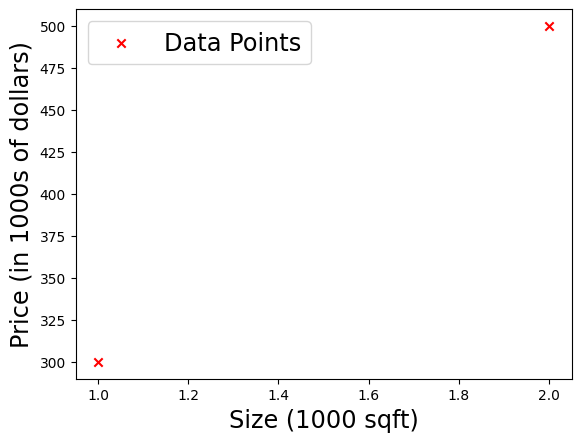

In [10]:
fig, ax = plt.subplots(1,1)
ax.scatter(x_train, y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model
The function implemeted by a neuron with no activation is the same as we learned.
$$
f_{w,b}(x^{(i)}) = wx^{(i)} + b
$$

In [13]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights

<bound method Layer.get_weights of <Dense name=dense_2, built=False>>

In [16]:
print(x_train[0])
x_train[0].reshape(1, 1)

[1.]


array([[1.]], dtype=float32)

In [19]:
al = linear_layer(x_train[0].reshape(1, 1))
print(al)
w, b = linear_layer.get_weights()
print(f"w = {w}, b = {b}")

tf.Tensor([[-0.04740906]], shape=(1, 1), dtype=float32)
w = [[-0.04740906]], b = [0.]


In [22]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [26]:
al = linear_layer(x_train[0].reshape(1, 1))
print(al)
alin = np.dot(set_w, x_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [27]:
prediction_tf = linear_layer(x_train)
prediction_np = np.dot(x_train, set_w) + set_b

[0. 1. 2. 3. 4. 5.]


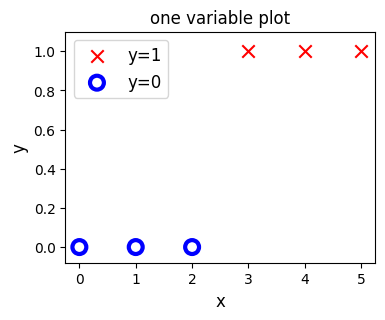

In [38]:
print(np.array([0., 1, 2, 3, 4, 5], dtype=np.float32))
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors="blue",lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [39]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim = 1, activation='sigmoid', name = 'L1')
    ]
)

c:\Users\Chiayu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.4563346]] [0.]
(1, 1) (1,)


# Simple Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
x, y = load_coffee_data()
print(x.shape, y.shape)     #200 x 2, 200 x 1

(200, 2) (200, 1)


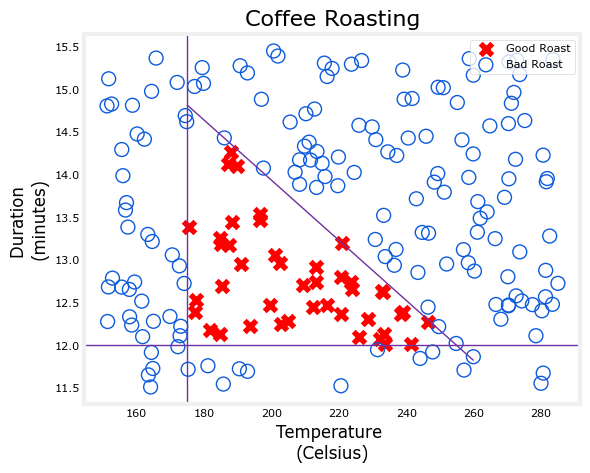

In [5]:
plt_roast(x, y)

In [47]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2, )),                        #The shape of Input.
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
    ]
)

In [50]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [56]:
"""
X has two variables. For each variable, we will get three weights since there are three units in first layer.
In next layer, The result from layer1 contains three variables, and there is only one unit in second layer.
"""
w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print(f"w1: {w1}\n b1: {b1}")
print(f"w2: {w2}\n b2: {b2}")

w1: [[-0.52  0.66  1.06]
 [ 0.93 -0.78  0.04]]
 b1: [0. 0. 0.]
w2: [[-0.22]
 [-0.01]
 [ 0.4 ]]
 b2: [0.]


In [61]:
print(f"Temperature Max, Min before normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min before normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x)
print(f"Temperature Max, Min after normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min after normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min before normalization: 284.99, 151.32
Duration    Max, Min before normalization: 15.45, 11.51
Temperature Max, Min after normalization: 1.66, -1.69
Duration    Max, Min after normalization: 1.79, -1.70


In [76]:
# np.tile(A, reps)
# A is the raw data
# reps means the times you want to make (row, column)

Xt = np.tile(Xn,(1000,1))
Yt= np.tile(y,(1000,1))   
print(Xt.shape, Yt.shape)   

(2000, 2) (2000, 1)


In [75]:
# Example
Xn = np.array([[1, 2], [3, 4]])
y = np.array([[5], [6]])
X_new = np.tile(Xn, (3, 4))  # 重複 3 次
Y_new = np.tile(y, (3, 1))   # 重複 3 次

print(X_new)
print(Y_new)

[[1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]
 [1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]
 [1 2 1 2 1 2 1 2]
 [3 4 3 4 3 4 3 4]]
[[5]
 [6]
 [5]
 [6]
 [5]
 [6]]


In [68]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

model.fit(Xt, Yt, epochs=10)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 763us/step - loss: 0.0022
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 799us/step - loss: 0.0017
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 821us/step - loss: 0.0013
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 759us/step - loss: 9.6701e-04
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 7.5095e-04
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 5.8812e-04
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 4.6441e-04
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 745us/step - loss: 3.6983e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 739us/step - loss: 2.9709e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 838us/step - loss: 2.4108e-04


In [69]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-11.82  17.09  -0.15]
 [ -0.26  14.23  -9.75]] 
b1: [-12.69   2.51 -12.05]
W2:
 [[-76.63]
 [-62.58]
 [-74.75]] 
b2: [44.7]


### Prodiction

In [70]:
X_test = np.array([
    [200, 13.9],
    [200, 17]
])
X_testn = norm_l(X_test)
prediction = model.predict(X_testn)
print("Prediction = \n", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction = 
 [[9.98e-01]
 [1.68e-08]]


In [79]:
Yhat = np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i] > 0.5:
        Yhat[i] = 1
    else:
        Yhat[i] = 0
print(f"decision = \n {Yhat}")

Yhat = (prediction >= 0.5).astype(int)
print(f"decision = \n {Yhat}")

decision = 
 [[1.]
 [0.]]
decision = 
 [[1]
 [0]]


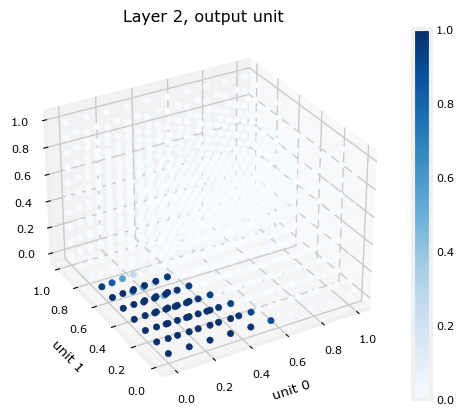

In [84]:
plt_output_unit(W2,b2)

ValueError: Unrecognized data type: x=<Normalization name=normalization_1, built=True> (of type <class 'keras.src.layers.preprocessing.normalization.Normalization'>)

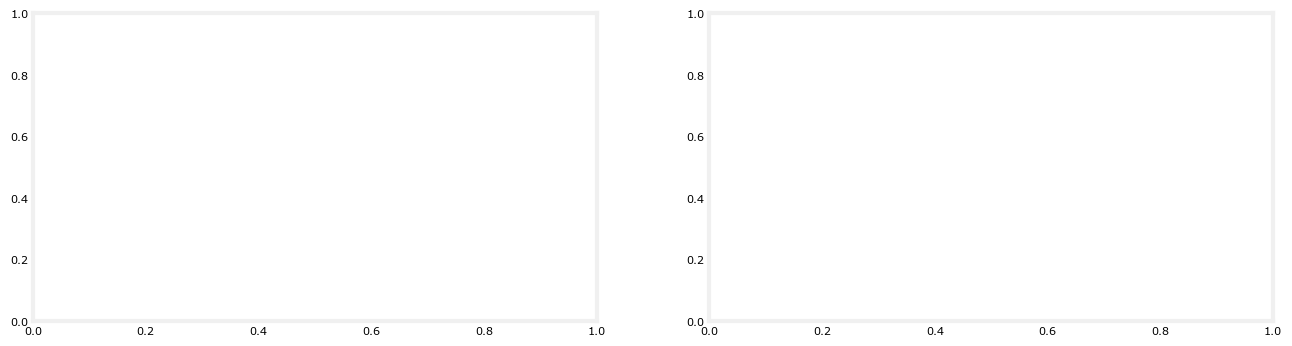

In [88]:
netf = lambda x: model.predict(norm_l)
plt_network(x, y, netf)